In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

In [23]:
people = fetch_lfw_people(min_faces_per_person=30)

In [24]:
people.images[0]

array([[109.333336, 104.666664,  97.333336, ...,  68.333336,  52.      ,
         70.666664],
       [ 96.333336, 104.      , 102.      , ...,  77.333336,  55.      ,
         60.333332],
       [ 93.333336,  99.333336,  99.333336, ...,  98.      ,  81.      ,
         75.333336],
       ...,
       [ 95.666664, 100.666664,  99.      , ...,  28.333334,  27.666666,
         14.      ],
       [ 77.333336,  90.      ,  97.      , ...,  32.666668,  28.      ,
          9.666667],
       [ 55.666668,  67.      ,  87.      , ...,  32.666668,  25.333334,
          8.      ]], dtype=float32)

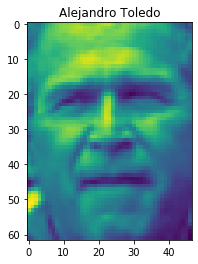

In [25]:
plt.imshow(people.images[0])
plt.title(people.target_names[0]);

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()

In [28]:
X = people.data/255.
xt = pca.fit_transform(X)

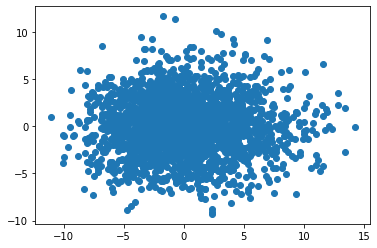

In [29]:
plt.scatter(xt[:, 0], xt[:, 1])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
y = people.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
knn.score(X_test, y_test)

0.36930860033726814

In [41]:
image_shape = people.images[0].shape

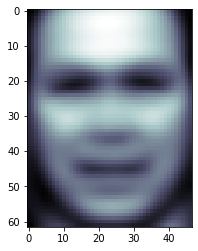

In [64]:
plt.imshow(pca.mean_.reshape(people.images[0].shape),
          cmap = plt.cm.bone)

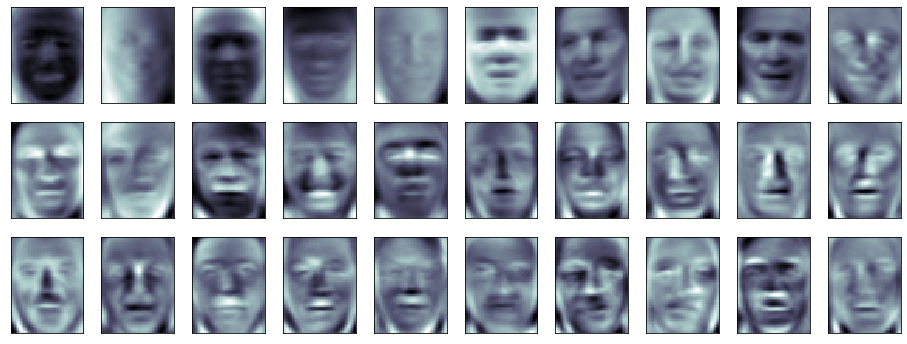

In [66]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(people.images[0].shape),
              cmap=plt.cm.bone)

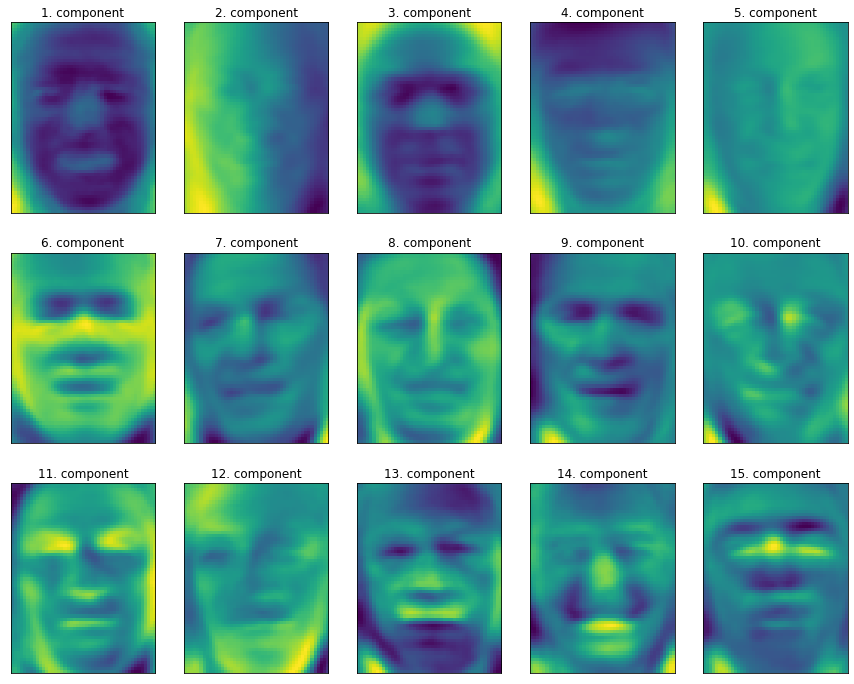

In [42]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

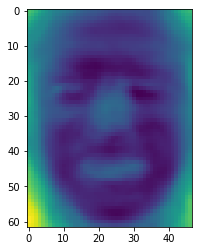

In [58]:
plt.imshow(pca.components_[0, :].reshape(image_shape))


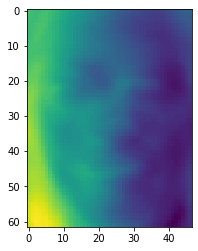

In [61]:
plt.imshow((pca.components_[0, :] + pca.components_[1, :]).reshape(image_shape))

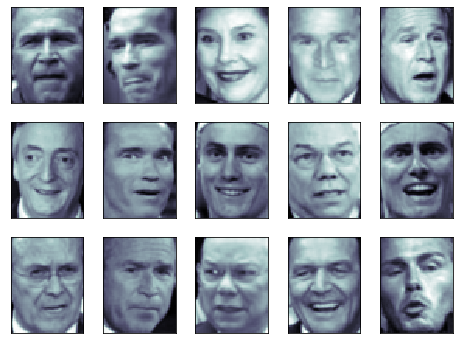

In [62]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(people.images[i], cmap=plt.cm.bone)